# Importing Statements

In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fixing the given data

## Calling

In [48]:
train_data = pd.read_csv('Seniors.csv')
train_data = train_data.drop(['Unnamed: 0'],axis=1)

train_data

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
2495,194.332813,22.269402,4327.675524,48809.223549,7.338530e+06,99.999999
2496,240.467829,15.981486,3843.033197,61906.574136,1.390474e+07,99.990852
2497,244.866196,24.901641,6097.570183,75400.755993,1.468142e+07,99.980421
2498,138.314203,10.700640,1480.050534,20356.081611,2.645949e+06,100.000000


## Correlating and deleting the columns

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.009883,0.585975,0.975767,0.970969,-0.470129
Pressure (kPa),-0.009883,1.000000,0.771878,0.160815,-0.009420,0.016942
Temperature x Pressure,0.585975,0.771878,1.000000,0.703844,0.568807,-0.259878
Material Fusion Metric,0.975767,0.160815,0.703844,1.000000,0.977445,-0.519979
Material Transformation Metric,0.970969,-0.009420,0.568807,0.977445,1.000000,-0.585221
Quality Rating,-0.470129,0.016942,-0.259878,-0.519979,-0.585221,1.000000


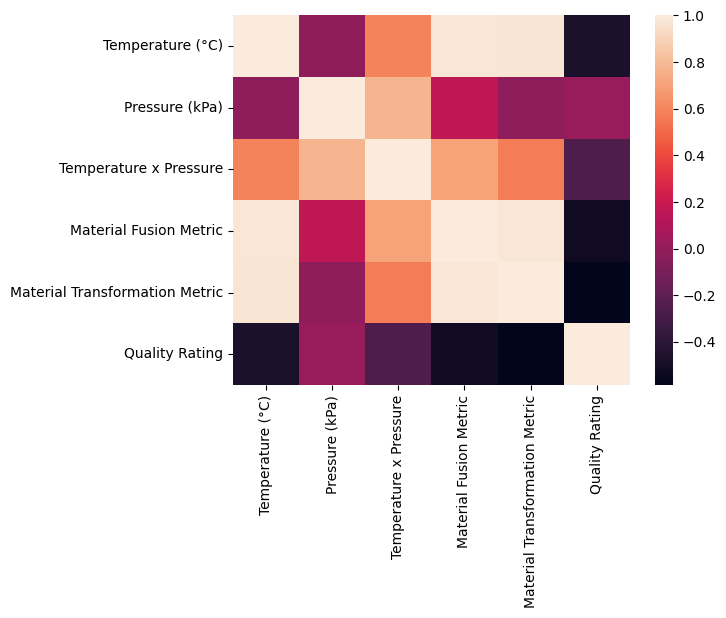

In [49]:
train_corr = train_data.corr()
sns.heatmap(train_corr)

train_corr

After seeing the above heatmap and co-relation table we realize theeeeese things.<br>
pressure is not related to quality rating.<br>
Material Fusion Metric and Material Transformation Metric.<br>
hence we are dropping them...

In [50]:
train_data = train_data.drop(['Pressure (kPa)','Material Fusion Metric'],axis=1)

train_data

,Temperature (°C),Temperature x Pressure,Material Transformation Metric,Quality Rating
0,209.762701,1688.769167,9.229576e+06,99.999971
1,243.037873,3842.931469,1.435537e+07,99.985703
2,220.552675,1729.823314,1.072839e+07,99.999758
3,208.976637,4970.736918,9.125702e+06,99.999975
4,184.730960,2918.345014,6.303792e+06,100.000000
...,...,...,...,...
2495,194.332813,4327.675524,7.338530e+06,99.999999
2496,240.467829,3843.033197,1.390474e+07,99.990852
2497,244.866196,6097.570183,1.468142e+07,99.980421
2498,138.314203,1480.050534,2.645949e+06,100.000000


# Defining all the functions

## genrating a polynomial function

In [51]:
def generate_polynomial_features(X, features, order):
    for feature in features:
        for i in range(2, order + 1):
            column_name = f"{feature}_power_{i}"
            X[column_name] = X[feature] ** i


## cost function

In [52]:
def cost(X,y,w,b):
    m = len(X)
    f = np.dot(X,w)+b
    error = f-y
    return 0.5*np.sum((error**2))/m


## gradiants function

In [53]:
def gradient(X,y,w,b):
    m = len(X)
    f = np.dot(X,w)+b
    error = f-y
    dbj = np.sum(error)
    dwj = np.dot(X.T,error)
    return dwj/m,dbj/m

## Gradiant descent

In [54]:
def gradient_descent(X,y,winit,binit,alpha,iterations):
    w = winit
    b = binit
    costs = []
    m = len(X)
    for i in range(iterations):
        dwj,dbj = gradient(X,y,w,b)
        w -= alpha*dwj
        b -= alpha*dbj
        costs.append(cost(X,y,w,b))
    return w,b,costs

## Predict function

In [55]:
def predict(X,w,b):
    f = np.clip(np.dot(X,w) +b,0,100)
    return f

## R2 function

In [56]:
def rsquared(y,yp):
    rsumsq = np.sum((y-yp)**2)
    tsumsq = np.sum((y-y.mean())**2)
    return 1 - rsumsq/tsumsq

# Training and testing

## Creating train and test set

In [57]:
X_Data = train_data.drop(['Quality Rating'],axis=1)
Y_Data = train_data['Quality Rating']

print(f"{X_Data}\n{Y_Data}")

      Temperature (°C)  Temperature x Pressure  Material Transformation Metric
0           209.762701             1688.769167                    9.229576e+06
1           243.037873             3842.931469                    1.435537e+07
2           220.552675             1729.823314                    1.072839e+07
3           208.976637             4970.736918                    9.125702e+06
4           184.730960             2918.345014                    6.303792e+06
...                ...                     ...                             ...
2495        194.332813             4327.675524                    7.338530e+06
2496        240.467829             3843.033197                    1.390474e+07
2497        244.866196             6097.570183                    1.468142e+07
2498        138.314203             1480.050534                    2.645949e+06
2499        232.434847             1481.664374                    1.255747e+07

[2500 rows x 3 columns]
0        99.999971
1       

## Generating a polynomial feature

we did this because,<br>
this was tested by trial and error <br>
when power was 1,<br>
Train data:0.4784283164563592  Test data:0.5025310974716584<br>
when power was 2,<br>
Train data:0.6590858628571653  Test data:0.6829587083539502<br>
when power was 3,<br>
Train data:0.7644873462632826  Test data:0.7833574995399285<br>
when power was 4,<br>
Train data:0.84770018783146  Test data:0.8618781052742805<br>
when power was 5,<br>
Train data:0.9050077066377447  Test data:0.9143039351344102<br>
when power was 6,<br>
Train data:0.9407970011495221  Test data:0.9459829289580257<br>
when power was 7,<br>
Train data:0.9626060361661221  Test data:0.9651636020503926<br>
when power was 8,<br>
Train data:0.9762707846219412  Test data:0.9773398771267968<br>
when power was 9,<br>
Train data:0.9850828210385715  Test data:0.9853765892288677<br>

Hence i thought of taking the power to be 9

In [58]:
generate_polynomial_features(X_Data, ['Temperature (°C)', 'Temperature x Pressure', 'Material Transformation Metric'], 9)

## Z score - normalization

In [59]:
X_Data = (X_Data-X_Data.mean())/X_Data.std()

X_Data

,Temperature (°C),Temperature x Pressure,Material Transformation Metric,Temperature (°C)_power_2,Temperature (°C)_power_3,Temperature (°C)_power_4,Temperature (°C)_power_5,Temperature (°C)_power_6,Temperature (°C)_power_7,Temperature (°C)_power_8,...,Temperature x Pressure_power_8,Temperature x Pressure_power_9,Material Transformation Metric_power_2,Material Transformation Metric_power_3,Material Transformation Metric_power_4,Material Transformation Metric_power_5,Material Transformation Metric_power_6,Material Transformation Metric_power_7,Material Transformation Metric_power_8,Material Transformation Metric_power_9
0,0.155400,-0.874360,-0.119535,0.012802,-0.119560,-0.231398,-0.319274,-0.384262,-0.429610,-0.459184,...,-0.305744,-0.272780,-0.384250,-0.476649,-0.484817,-0.463475,-0.435556,-0.408910,-0.385535,-0.365457
1,0.723081,0.599678,0.548033,0.647325,0.548033,0.437818,0.326703,0.221259,0.125142,0.039963,...,-0.233997,-0.231328,0.221252,-0.033973,-0.194506,-0.284266,-0.328896,-0.346895,-0.350037,-0.345359
2,0.339479,-0.846268,0.075666,0.208338,0.075641,-0.046027,-0.150029,-0.234440,-0.300181,-0.349537,...,-0.305723,-0.272774,-0.234425,-0.385224,-0.435421,-0.438657,-0.423666,-0.403401,-0.383044,-0.364352
3,0.141989,1.371406,-0.133064,-0.001060,-0.133023,-0.243833,-0.330315,-0.393766,-0.437591,-0.465755,...,0.257109,0.147570,-0.393800,-0.481999,-0.487466,-0.464692,-0.436088,-0.409135,-0.385627,-0.365495
4,-0.271647,-0.032993,-0.500581,-0.403062,-0.500582,-0.563860,-0.598487,-0.611878,-0.610885,-0.600910,...,-0.297897,-0.269321,-0.611879,-0.585831,-0.531627,-0.482305,-0.442839,-0.411656,-0.386552,-0.365830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.107837,0.931376,-0.365820,-0.249781,-0.365788,-0.451099,-0.507796,-0.541155,-0.557064,-0.560745,...,-0.120002,-0.151984,-0.541176,-0.556339,-0.520734,-0.478564,-0.441614,-0.411268,-0.386432,-0.365793
2496,0.679235,0.599747,0.489345,0.594993,0.489346,0.375223,0.262527,0.157476,0.063292,-0.018840,...,-0.233982,-0.231318,0.157469,-0.088987,-0.236443,-0.313942,-0.348884,-0.359894,-0.358272,-0.350470
2497,0.754272,2.142469,0.590498,0.684892,0.590546,0.483574,0.374040,0.268733,0.171596,0.084528,...,2.580580,2.371195,0.268672,0.008049,-0.161594,-0.260339,-0.312340,-0.335835,-0.342840,-0.340771
2498,-1.063526,-1.017181,-0.976969,-1.034540,-0.976987,-0.907992,-0.838998,-0.775854,-0.720621,-0.673326,...,-0.305809,-0.272798,-0.775846,-0.633108,-0.544242,-0.485550,-0.443657,-0.411860,-0.386602,-0.365842


## Creating test and Train

In [60]:
test_size = 0.3
test_len = int(test_size * len(X_Data))
train_len = len(X_Data) - test_len

X_train, Y_train = X_Data.iloc[test_len:], Y_Data.iloc[test_len:]
X_test, Y_test = X_Data.iloc[:test_len], Y_Data.iloc[:test_len]


i took the 70% of my data to train the model,<br>
and other 30% to test the model.<br>
so  i took the test size to be 0.7.<br>

In [61]:
print(f"{X_train}\n{Y_train}\n{X_test}\n{Y_test}")

      Temperature (°C)  Temperature x Pressure  \
750          -0.692184               -0.771409   
751           0.157744                0.381986   
752           1.458816               -0.543673   
753           0.059685                0.007868   
754          -0.805453               -0.226454   
...                ...                     ...   
2495         -0.107837                0.931376   
2496          0.679235                0.599747   
2497          0.754272                2.142469   
2498         -1.063526               -1.017181   
2499          0.542191               -1.016076   

      Material Transformation Metric  Temperature (°C)_power_2  \
750                        -0.787327                 -0.761012   
751                        -0.117200                  0.015230   
752                         1.730383                  1.608448   
753                        -0.213449                 -0.084995   
754                        -0.851105                 -0.848675   
...

## Finding Weights ,bias and Cost history

In [62]:
winit = np.zeros(X_train.shape[1])  
binit = 0  
w, b, cost_history = gradient_descent(X_train, Y_train, winit, binit, 0.01, 4321)

here we did<br>
Initialize weights with the number of features<br>
also Initialize bias to 0<br>
then sent them to gradiant descent by telling<br>
learning rate as 0.01<br>
and no of iteration to be 4321

In [63]:
print(f"{w}\n{b}")

[-0.45243966  0.28914747 -0.86763638 -0.90464916 -0.86760559 -0.48307324
  0.08644616  0.70382574  1.27175563  1.7298866   2.04618281  0.01805399
 -0.15777676 -0.21844106 -0.1800688  -0.0800274   0.04375398  0.16282906
  0.25997953  0.70384712  2.04622187  2.07649342  0.90110222 -1.12688843
 -3.68932853 -6.55108621 -9.54995094]
96.01693937311555


## Ploting cost vs epoch

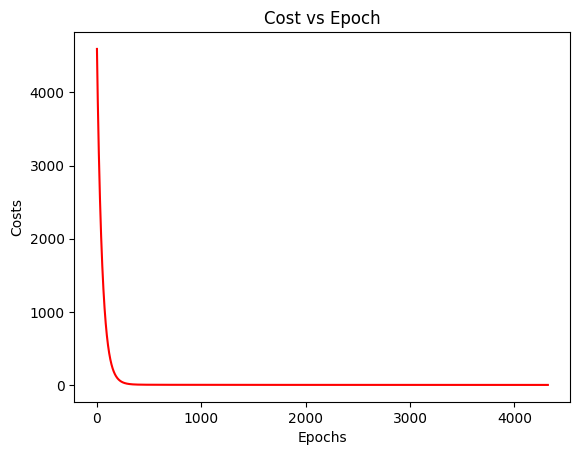

In [64]:
plt.title('Cost vs Epoch')
plt.plot(range(len(cost_history)),cost_history,color='red')
plt.xlabel('Epochs')
plt.ylabel('Costs')
plt.show()

## Predicting

In [65]:
ypre_train = predict(X_train,w,b)
ypre_test = predict(X_test,w,b)

print(f"{ypre_train}\n{ypre_test}")

[ 99.55822683  99.09232217  82.69910776 ... 100.         100.
  99.92848026]
[ 98.92369693 100.          99.26042953  98.89993183  99.11483904
  99.77307378  99.0825811   95.33824351  60.79608143  99.2322766
 100.          98.77543827  98.94946264  85.13242025 100.
 100.         100.         100.         100.          98.70569674
  45.52287138 100.          98.85634042 100.         100.
  99.81337019 100.          75.06537425  99.01520753  98.87139879
  99.59838594 100.          98.78669064  99.14953416 100.
  99.438686    99.49200207  99.38205534  75.80438307 100.
  99.38544213  99.00376956 100.         100.         100.
 100.         100.         100.          99.50942158  99.12987857
  99.1889613   99.08499862  35.53435019 100.          99.98070013
 100.          99.79325206  99.92478747  98.96968377  99.79179674
 100.         100.          99.96974089 100.         100.
  99.34886967 100.         100.         100.         100.
  48.06661388  98.92860175  47.53763351  99.42651179 100

## R2 Score

In [66]:
print(f"Train data :{rsquared(Y_train,ypre_train)}\nTest data :{rsquared(Y_test,ypre_test)}")

Train data :0.9864779579585887
Test data :0.9864224086763352


# Predicting the quality ratings

## Handling the data of Junior.csv

In [67]:
junior = pd.read_csv('Juniors.csv')
junior = junior.drop(['Unnamed: 0.1','Unnamed: 0','Pressure (kPa)','Material Fusion Metric'],axis=1)

junior

,Temperature (°C),Temperature x Pressure,Material Transformation Metric
0,270.264688,2979.333789,1.974082e+07
1,147.113440,3656.048303,3.183265e+06
2,251.636694,4998.003812,1.593350e+07
3,226.765023,5283.903266,1.166025e+07
4,291.025207,4917.422268,2.464829e+07
...,...,...,...
1452,156.811578,3417.596965,3.855501e+06
1453,197.850406,1640.516924,7.744742e+06
1454,241.357144,3956.304672,1.405957e+07
1455,209.040239,4977.234763,9.134036e+06


## Generating polynomial

In [68]:
generate_polynomial_features(junior, ['Temperature (°C)'], 9)
generate_polynomial_features(junior, ['Temperature x Pressure'], 9)
generate_polynomial_features(junior, ['Material Transformation Metric'], 9)

junior

,Temperature (°C),Temperature x Pressure,Material Transformation Metric,Temperature (°C)_power_2,Temperature (°C)_power_3,Temperature (°C)_power_4,Temperature (°C)_power_5,Temperature (°C)_power_6,Temperature (°C)_power_7,Temperature (°C)_power_8,...,Temperature x Pressure_power_8,Temperature x Pressure_power_9,Material Transformation Metric_power_2,Material Transformation Metric_power_3,Material Transformation Metric_power_4,Material Transformation Metric_power_5,Material Transformation Metric_power_6,Material Transformation Metric_power_7,Material Transformation Metric_power_8,Material Transformation Metric_power_9
0,270.264688,2979.333789,1.974082e+07,73043.001351,1.974094e+07,5.335280e+09,1.441938e+12,3.897049e+14,1.053235e+17,2.846521e+19,...,6.208023e+27,1.849577e+31,3.897001e+14,7.693000e+21,1.518661e+29,2.997963e+36,5.918225e+43,1.168306e+51,2.306333e+58,4.552890e+65
1,147.113440,3656.048303,3.183265e+06,21642.364258,3.183883e+06,4.683919e+08,6.890675e+10,1.013711e+13,1.491305e+15,2.193910e+17,...,3.192239e+28,1.167098e+32,1.013318e+13,3.225659e+19,1.026813e+26,3.268617e+32,1.040487e+39,3.312147e+45,1.054344e+52,3.356257e+58
2,251.636694,4998.003812,1.593350e+07,63321.025757,1.593389e+07,4.009552e+09,1.008950e+12,2.538890e+14,6.388778e+16,1.607651e+19,...,3.893791e+29,1.946118e+33,2.538764e+14,4.045139e+21,6.445322e+28,1.026965e+36,1.636315e+43,2.607223e+50,4.154218e+57,6.619123e+64
3,226.765023,5283.903266,1.166025e+07,51422.375489,1.166080e+07,2.644261e+09,5.996258e+11,1.359742e+14,3.083418e+16,6.992115e+18,...,6.076295e+29,3.210656e+33,1.359615e+14,1.585346e+21,1.848553e+28,2.155460e+35,2.513321e+42,2.930595e+49,3.417148e+56,3.984482e+63
4,291.025207,4917.422268,2.464829e+07,84695.671048,2.464858e+07,7.173357e+09,2.087628e+12,6.075523e+14,1.768130e+17,5.145705e+19,...,3.419007e+29,1.681270e+33,6.075382e+14,1.497478e+22,3.691026e+29,9.097749e+36,2.242440e+44,5.527230e+51,1.362368e+59,3.358003e+66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,156.811578,3417.596965,3.855501e+06,24589.871009,3.855976e+06,6.046618e+08,9.481796e+10,1.486855e+13,2.331562e+15,3.656158e+17,...,1.861087e+28,6.360447e+31,1.486489e+13,5.731161e+19,2.209650e+26,8.519309e+32,3.284621e+39,1.266386e+46,4.882553e+52,1.882469e+59
1453,197.850406,1640.516924,7.744742e+06,39144.783139,7.744811e+06,1.532314e+09,3.031690e+11,5.998210e+13,1.186748e+16,2.347986e+18,...,5.246211e+25,8.606497e+28,5.998104e+13,4.645377e+20,3.597725e+27,2.786345e+34,2.157953e+41,1.671279e+48,1.294362e+55,1.002450e+62
1454,241.357144,3956.304672,1.405957e+07,58253.271108,1.405984e+07,3.393444e+09,8.190319e+11,1.976792e+14,4.771128e+16,1.151546e+19,...,6.002302e+28,2.374693e+32,1.976716e+14,2.779179e+21,3.907407e+28,5.493649e+35,7.723836e+42,1.085939e+50,1.526783e+57,2.146592e+64
1455,209.040239,4977.234763,9.134036e+06,43697.821702,9.134603e+06,1.909500e+09,3.991623e+11,8.344097e+13,1.744252e+16,3.646189e+18,...,3.766214e+29,1.874533e+33,8.343062e+13,7.620583e+20,6.960668e+27,6.357899e+34,5.807328e+41,5.304435e+48,4.845090e+55,4.425523e+62


## Standerisation

In [70]:
junior = (junior- junior.mean())/junior.std()

junior

,Temperature (°C),Temperature x Pressure,Material Transformation Metric,Temperature (°C)_power_2,Temperature (°C)_power_3,Temperature (°C)_power_4,Temperature (°C)_power_5,Temperature (°C)_power_6,Temperature (°C)_power_7,Temperature (°C)_power_8,...,Temperature x Pressure_power_8,Temperature x Pressure_power_9,Material Transformation Metric_power_2,Material Transformation Metric_power_3,Material Transformation Metric_power_4,Material Transformation Metric_power_5,Material Transformation Metric_power_6,Material Transformation Metric_power_7,Material Transformation Metric_power_8,Material Transformation Metric_power_9
0,1.244047,0.029798,1.326243,1.302375,1.326227,1.319908,1.289633,1.241570,1.181023,1.112263,...,-0.275502,-0.249965,1.241593,1.038630,0.810454,0.597627,0.414581,0.263997,0.143592,0.049298
1,-0.904937,0.495516,-0.893051,-0.916395,-0.893003,-0.849593,-0.798006,-0.745775,-0.696850,-0.652837,...,-0.240017,-0.229916,-0.745783,-0.614030,-0.524486,-0.463324,-0.419273,-0.385936,-0.359692,-0.338372
2,0.918990,1.419057,0.815928,0.882714,0.815948,0.728942,0.631293,0.530464,0.431632,0.338085,...,0.253263,0.143528,0.530433,0.251674,0.041553,-0.099967,-0.188733,-0.240897,-0.269040,-0.282011
3,0.484980,1.615814,0.243163,0.369095,0.243202,0.120339,0.008931,-0.086916,-0.166164,-0.229605,...,0.554443,0.401663,-0.086958,-0.278980,-0.362787,-0.387152,-0.383875,-0.369634,-0.352236,-0.334979
4,1.606318,1.363600,1.984016,1.805376,1.984023,2.139263,2.271379,2.382177,2.473959,2.549038,...,0.187744,0.089463,2.382173,2.609536,2.721308,2.756519,2.740276,2.688885,2.613249,2.520906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,-0.735705,0.331413,-0.802948,-0.789163,-0.802919,-0.788848,-0.758609,-0.721002,-0.681653,-0.643700,...,-0.258387,-0.240757,-0.721009,-0.608625,-0.523446,-0.463138,-0.419241,-0.385930,-0.359691,-0.338372
1453,-0.019579,-0.891583,-0.281653,-0.160882,-0.281678,-0.375331,-0.441820,-0.484796,-0.509190,-0.519820,...,-0.283997,-0.253723,-0.484785,-0.520773,-0.493743,-0.453578,-0.416247,-0.385008,-0.359410,-0.338287
1454,0.739612,0.702154,0.564757,0.663958,0.564759,0.454300,0.342529,0.236160,0.139069,0.053062,...,-0.201239,-0.205265,0.236150,-0.021433,-0.181686,-0.269003,-0.310460,-0.325526,-0.326375,-0.320094
1455,0.175683,1.404764,-0.095439,0.035655,-0.095397,-0.207194,-0.295866,-0.361970,-0.408361,-0.438694,...,0.235658,0.128915,-0.362005,-0.456589,-0.464162,-0.440937,-0.411105,-0.382987,-0.358635,-0.337995


## Predicting and inputing it to csv file

In [71]:
quality_predictions = predict(junior,w,b)

quality_predictions

array([100.        ,  99.65111461, 100.        , ..., 100.        ,
        98.51068926,  99.16844452])

In [72]:
answer = pd.DataFrame(quality_predictions,columns=['Quality Rating'])
answer.to_csv('Quality_rating.csv')